In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits
from astropy.modeling.blackbody import blackbody_lambda

sys.path.insert(0, '../')
from libra import Spot, Star

In [2]:
phoenix = fits.getdata('../libra/data/phoenix/lte026.0-4.5-0.0a+0.0.BT-Settl.spec.fits')

kplr = ascii.read('../libra/data/filters/kepler_response_hires1.txt')
kplr_wavelength, kplr_trans = kplr['col1'], kplr['col2']
phoenix_wavelength = phoenix['Wavelength']*1000 * u.nm
phoenix_flux = phoenix['Flux'] / phoenix['Flux'].max()

kplr = ascii.read('../libra/data/filters/kepler_response_hires1.txt')

bb_2559 = blackbody_lambda(phoenix_wavelength, 2559)
bb_2600 = blackbody_lambda(phoenix_wavelength, 2600)

spitz_1 = ascii.read('../libra/data/filters/Spitzer_IRAC.I1.txt')
spitz1_wave = (spitz_1['col1'] * u.Angstrom).to(u.nm)
spitz1_trans = spitz_1['col2']

spitz_2 = ascii.read('../libra/data/filters/Spitzer_IRAC.I2.txt')
spitz2_wave = (spitz_2['col1'] * u.Angstrom).to(u.nm)
spitz2_trans = spitz_2['col2']

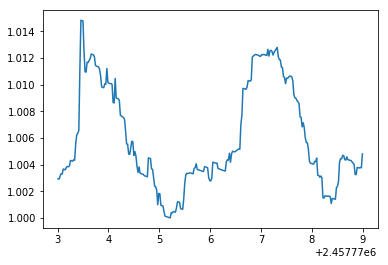

In [354]:
k2_time, k2_flux, k2_err = np.loadtxt('../libra/data/trappist1/trappist_rotation.txt', unpack=True)
k2_flux /= np.percentile(k2_flux, 0)
# slice in time
condition = (k2_time > 2457773) & (k2_time < 2457779)
k2_time, k2_flux, k2_err= k2_time[condition], k2_flux[condition], k2_err[condition]

plt.plot(k2_time, k2_flux)

std:  0.00118321694268
270 270


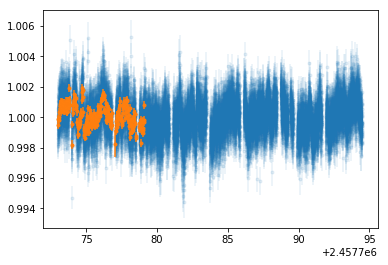

In [355]:
spitzer_time, spitzer_flux, spitzer_err, _ = np.loadtxt('../libra/data/T1_Spitzer.txt', 
                                              unpack=True, delimiter=',')
spitzer_time += k2_time.min() - spitzer_time[0]
spitzer_flux += 1

spitzer_std = np.std(spitzer_flux)
print('std: ', spitzer_std)

from scipy.stats import binned_statistic

# Old spitzer bins on 1.8 rotations

# bins = np.arange(k2_time.min(), k2_time.max()+6*(k2_time[1]-k2_time[0]), k2_time[1]-k2_time[0])
# bs1 = binned_statistic(spitzer_time, spitzer_flux, statistic='mean', bins=bins)
# bs2 = binned_statistic(spitzer_time, spitzer_flux, statistic='std', bins=bins)
# bs3 = binned_statistic(spitzer_time, spitzer_err, statistic='mean', bins=bins)
# bs4 = binned_statistic(spitzer_time, spitzer_err, statistic='count', bins=bins)

# plt.errorbar(spitzer_time, spitzer_flux, spitzer_err, fmt='.', alpha=0.1)

# bincenters = 0.5 * (bins[1:] + bins[:-1])

# spitzer_times = bincenters
# spitzer_fluxes = bs1.statistic
# spitzer_errors = bs3.statistic / np.sqrt(bs4.statistic)

# spitzer_times = spitzer_times[~np.isnan(spitzer_fluxes)]
# spitzer_errors = spitzer_errors[~np.isnan(spitzer_fluxes)]
# spitzer_fluxes = spitzer_fluxes[~np.isnan(spitzer_fluxes)]

# plt.errorbar(spitzer_times, spitzer_fluxes, spitzer_errors, fmt='.', zorder=100)
# print(len(spitzer_times), len(k2_time))

# New spitzer bins 
#bins = np.arange(k2_time.min(), k2_time.max()+6*(k2_time[1]-k2_time[0]), k2_time[1]-k2_time[0])

k2_cadence = (k2_time[1]-k2_time[0])
n_bins = 
bins = np.arange(spitzer_time.min(), spitzer_time.max(), k2_time[1]-k2_time[0])
bs1 = binned_statistic(spitzer_time, spitzer_flux, statistic='mean', bins=bins)
bs2 = binned_statistic(spitzer_time, spitzer_flux, statistic='std', bins=bins)
bs3 = binned_statistic(spitzer_time, spitzer_err, statistic='mean', bins=bins)
bs4 = binned_statistic(spitzer_time, spitzer_err, statistic='count', bins=bins)

plt.errorbar(spitzer_time, spitzer_flux, spitzer_err, fmt='.', alpha=0.1)

bincenters = 0.5 * (bins[1:] + bins[:-1])

spitzer_times = bincenters
spitzer_fluxes = bs1.statistic
spitzer_errors = bs3.statistic / np.sqrt(bs4.statistic)

spitzer_times = spitzer_times[~np.isnan(spitzer_fluxes)]
spitzer_errors = spitzer_errors[~np.isnan(spitzer_fluxes)]
spitzer_fluxes = spitzer_fluxes[~np.isnan(spitzer_fluxes)]

plt.errorbar(spitzer_times, spitzer_fluxes, spitzer_errors, fmt='.', zorder=100)
print(len(spitzer_times), len(k2_time))

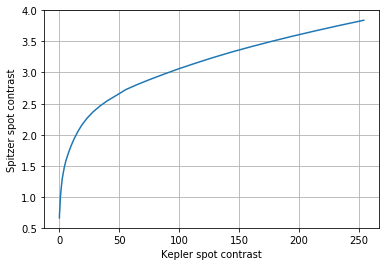

In [356]:
kepler_contrast, spitzer_contrast = np.loadtxt('kepler_to_spitzer_contrast.txt', unpack=True)

def kepler_to_spitzer_contrast_interp(contrast):
    return np.interp(contrast, kepler_contrast, spitzer_contrast)

plt.plot(kepler_contrast, spitzer_contrast)
plt.grid()
plt.xlabel('Kepler spot contrast')
plt.ylabel('Spitzer spot contrast')
plt.savefig('kepler_spitzer_contrasts.png', dpi=200)

In [357]:
# plt.plot(kepler_contrast_range, spitzer_contrast_range)
# contrast_p = np.polyfit(kepler_contrast_range, spitzer_contrast_range, 10)

# contrast_p = np.array([ -2.86673787e+00,   3.04324483e+01,  -1.39102663e+02,
#                          3.58168264e+02,  -5.70729646e+02,   5.82371946e+02,
#                         -3.80959509e+02,   1.55908866e+02,  -3.81530016e+01,
#                          5.54607524e+00,   3.85779028e-01])

# def kepler_to_spitzer_contrast_interp(kepler_contrast):
#     return np.polyval(contrast_p, kepler_contrast)

# plt.plot(kepler_contrast_range, np.polyval(contrast_p, kepler_contrast_range), ls='--')
# plt.xlabel('kepler contrast')
# plt.ylabel('spitzer contrast')
# plt.grid()

In [616]:
from scipy.interpolate import interp2d
spotted_areas, fractional_color_error, spot_temperatures = [i[1] for i in np.load('color_grid.npz').items()]
interpolate_color_error = interp2d(spot_temperatures, spotted_areas, fractional_color_error)

In [624]:
kepler_contrasts, spot_temperatures = np.loadtxt('contrast_to_temperature.txt', unpack=True)
interpolate_contrast_to_temperature = lambda x: np.interp(x, kepler_contrasts, spot_temperatures)

In [625]:
interpolate_contrast_to_temperature(30)

3731.0433621032603

In [638]:
def model(p, kepler_time):
    lat0, lon0, rad0, lat1, lon1, rad1, lat2, lon2, rad2, kepler_contrast, kep_offset = p
    
    # Kepler
    spots = [Spot.from_latlon(lat0, lon0, rad0, contrast=kepler_contrast), 
             Spot.from_latlon(lat1, lon1, rad1, contrast=kepler_contrast), 
             Spot.from_latlon(lat2, lon2, rad2, contrast=kepler_contrast)]

    kepler_star = Star(spots=spots, rotation_period=3.3*u.day, u1=1.00, u2=-0.04)
    kepler_model_flux = kepler_star.flux(kepler_time)
    norm_factor = np.min(kepler_model_flux)
    kepler_model_flux /= norm_factor
    kepler_model_flux += kep_offset
    
    # Spitzer
    spitzer_contrast = kepler_to_spitzer_contrast_interp(kepler_contrast)
    #print(spitzer_contrast / kepler_contrast)
#     spitzer_model_flux = (kepler_model_flux - 1) * spitzer_contrast / kepler_contrast + 1
#     spitzer_model_flux /= np.median(spitzer_model_flux)

    spots = [Spot.from_latlon(lat0, lon0, rad0, contrast=spitzer_contrast), 
             Spot.from_latlon(lat1, lon1, rad1, contrast=spitzer_contrast), 
             Spot.from_latlon(lat2, lon2, rad2, contrast=spitzer_contrast)]

    spitzer_star = Star(spots=spots, rotation_period=3.3*u.day, u1=1.00, u2=-0.04)
    spitzer_model_flux = spitzer_star.flux(kepler_time)
    spitzer_model_flux /= np.median(spitzer_model_flux)

    return kepler_model_flux, spitzer_model_flux

def chi2(p, kepler_time):
    kepler_model_flux, model_spitzer_flux = model(p, kepler_time)
    k2_chi2 = np.sum((kepler_model_flux - k2_flux)**2 / (2*k2_err)**2)
    spitzer_chi2 = np.sum((model_spitzer_flux - spitzer_fluxes)**2 / (2*spitzer_errors)**2)
    return k2_chi2 + spitzer_chi2

def lnprior(p):
    lat0, lon0, rad0, lat1, lon1, rad1, lat2, lon2, rad2, contrast, kep_offset = p
    lats = np.array([lat0, lat1, lat2])
    lons = np.array([lon0, lon1, lon2])
    rads = np.array([rad0, rad1, rad2])
    
    if np.any(lats < -90) or np.any(lats > 90):
        return -np.inf
    if np.any(lons < 0) or np.any(lons > 360):
        return -np.inf
    if np.any(rads < 0) or np.any(rads > 1):
        return -np.inf
    # Bright Spot initial conditions
    if not (300 < lon0 < 360 and 30 < lon1 < 70 and 190 < lon2 < 280):
        return -np.inf
    if not (1 < contrast < 100):
        return -np.inf
    if not (-1 < kep_offset < 1):
        return -np.inf
    
    # Limit color variations
    temperature = interpolate_contrast_to_temperature(contrast)
    maximum_radius = np.max(rads)
    spotted_area = maximum_radius**2 
    if not (interpolate_color_error(temperature, spotted_area) < 0.05):
        return -np.inf

    return 0

def lnprob(p, kepler_time):
    lp = lnprior(p)
    if not np.isfinite(lp):
        return -np.inf
    return lp + -0.5*chi2(p, kepler_time)

initp = np.array([0, 330, 0.02, 
                  0,  50, 0.008, 
                  0, 210, 0.008, 20, 0])
ndim, nwalkers = 11, 40
pos = [initp + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]

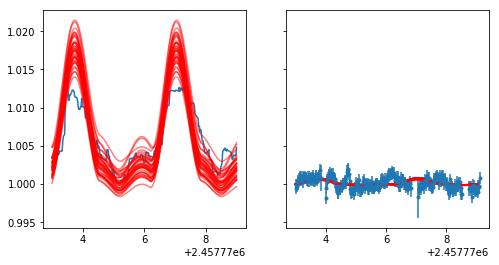

In [639]:

# # dark spots
# initp = np.array([  0.00000000e+00,   145,  0.2,
#                     0.00000000e+00,   225,  0.2,
#                     0.00000000e+00,   70,   0.2, 
#                     0.9, 0])

# bright spots

initp = np.array([0, 330, 0.02, 
                  0,  50, 0.008, 
                  0, 210, 0.008, 30, 0])
pos = [initp + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
ax[0].plot(k2_time, k2_flux)
ax[1].errorbar(spitzer_times, spitzer_fluxes, spitzer_errors*3, fmt='.')
for p in pos:
    model_k2_fluxes, model_spitzer_flux = model(p, k2_time)
    ax[0].plot(k2_time, model_k2_fluxes, color='r', alpha=0.5)
    ax[1].plot(k2_time, model_spitzer_flux, color='r', alpha=0.5)
    #print(model_spitzer_std, spitzer_std)

In [641]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(k2_time, ), 
                                threads=8)
sampler.run_mcmc(pos, 1000);

In [642]:
n_burnin = 700
# n_burnin = 2000
samples = sampler.chain[:, n_burnin:, :].reshape((-1, ndim))
# samples = sampler.flatchain

In [643]:
#np.savetxt('posteriors_bright_spot.txt', samples)

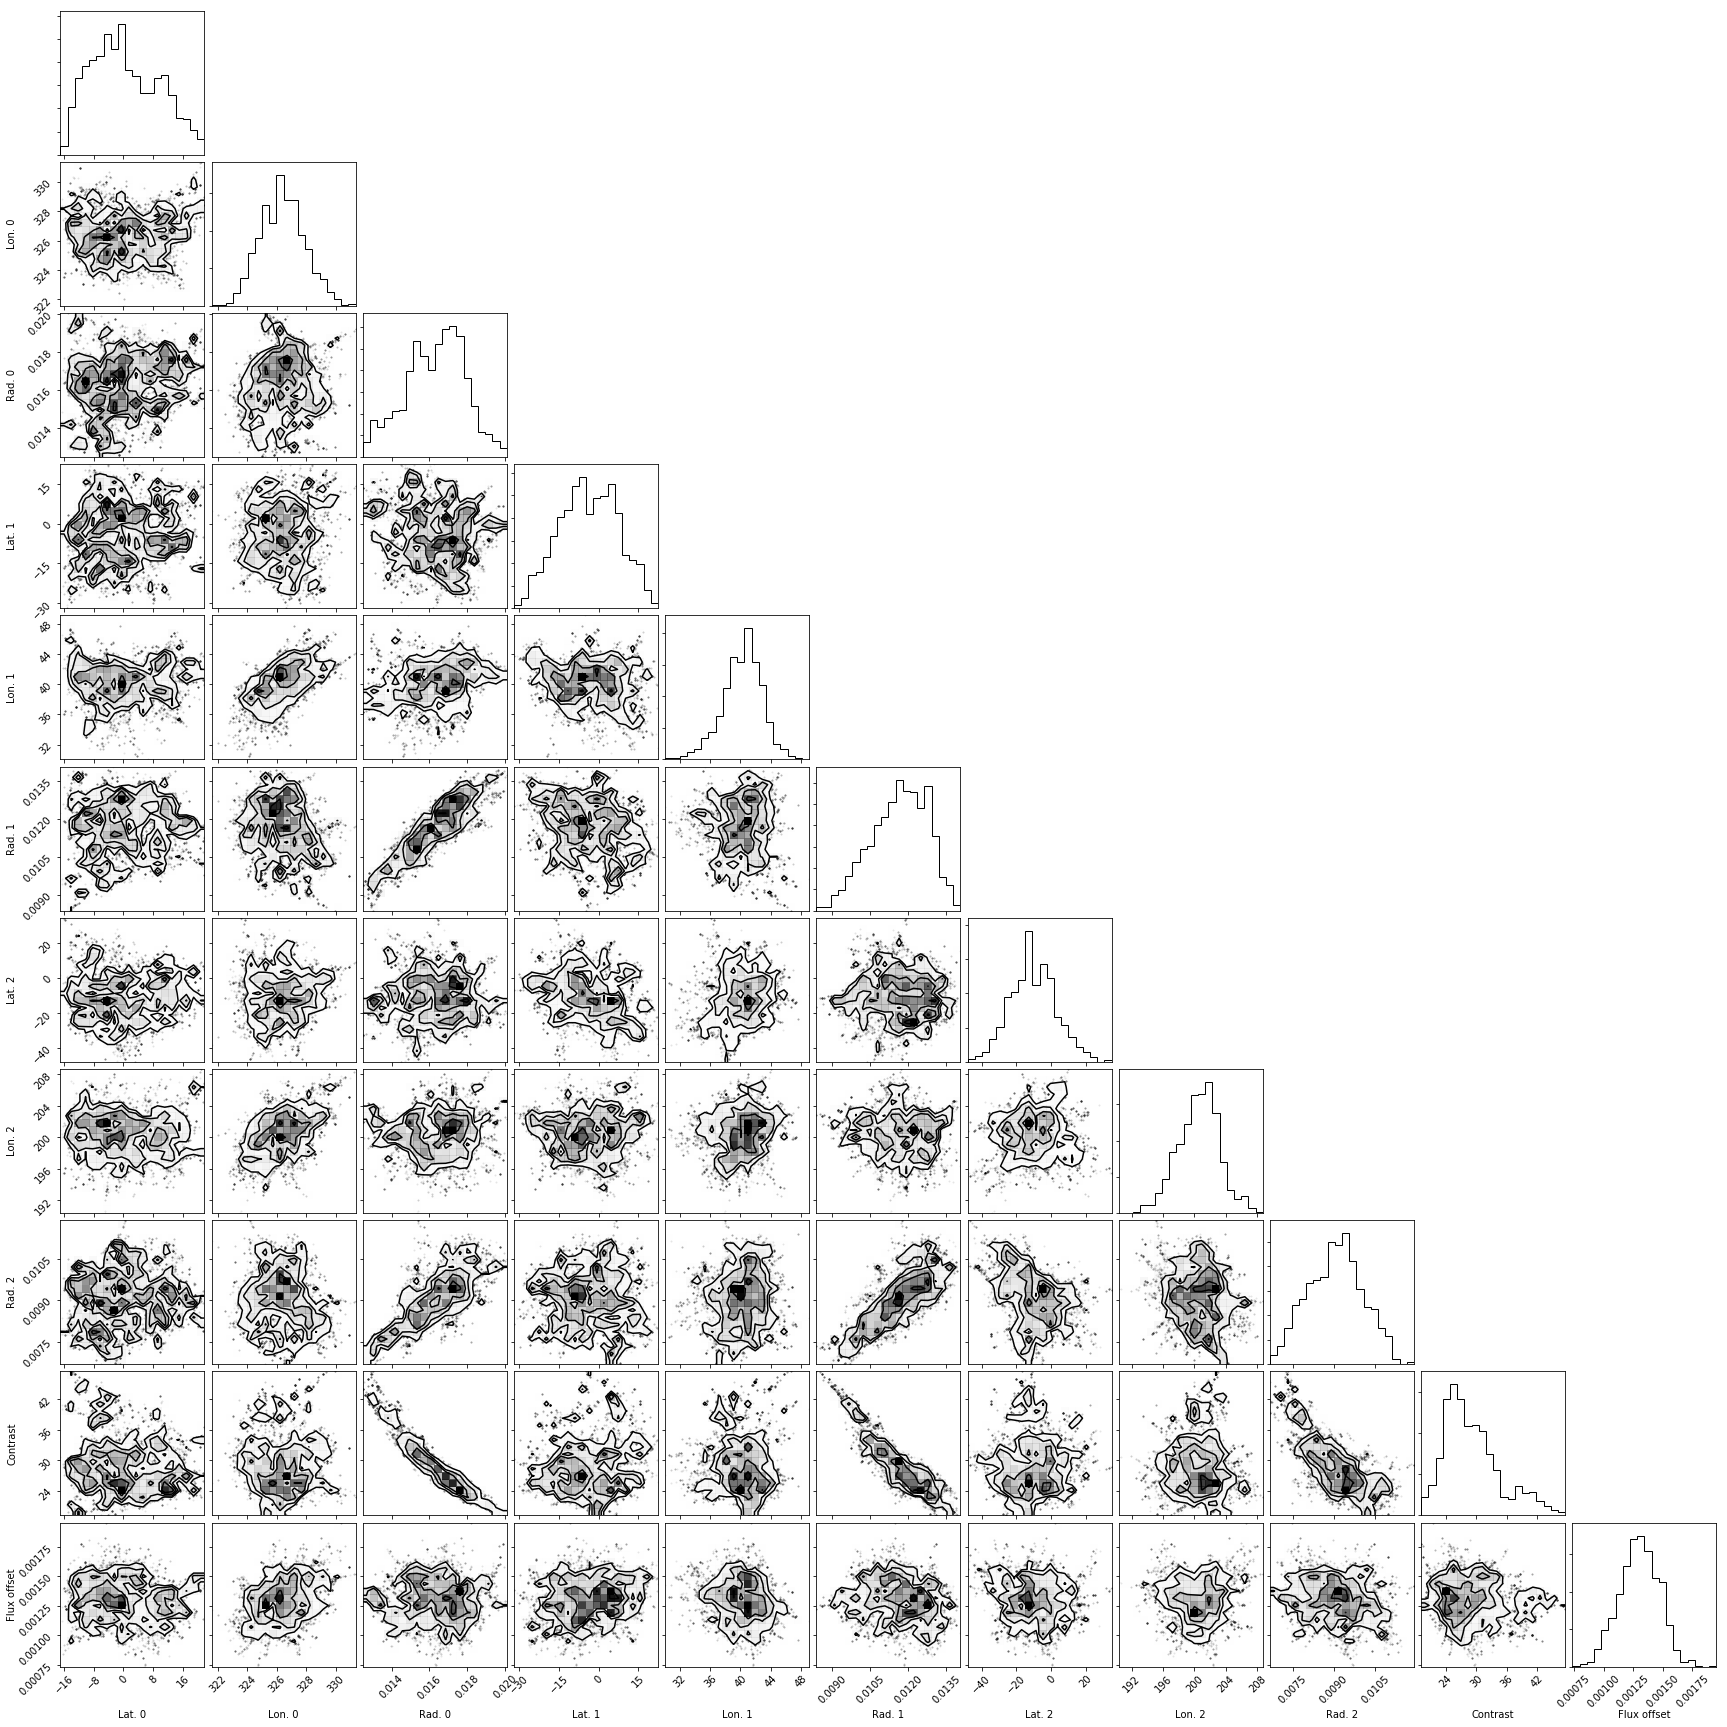

In [644]:
labels = ['Lat. 0', 'Lon. 0', 'Rad. 0', 'Lat. 1', 'Lon. 1', 'Rad. 1', 
          'Lat. 2', 'Lon. 2', 'Rad. 2', 'Contrast', 'Flux offset']
from corner import corner

corner(samples, labels=labels)

#plt.savefig('corner_bright_spitzer.png', bbox_inches='tight', dpi=250)
#plt.savefig('corner_bright_spitzer.pdf', bbox_inches='tight')
plt.show()

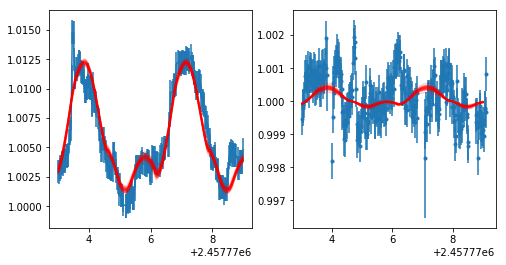

In [572]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].errorbar(k2_time, k2_flux, 2*k2_err)
ax[1].errorbar(spitzer_times, spitzer_fluxes, spitzer_errors*2, fmt='.')
for p in samples[np.random.randint(0, samples.shape[0], 50), :]:
    model_k2_fluxes, model_spitzer_flux = model(p, k2_time)
    ax[0].plot(k2_time, model_k2_fluxes, alpha=0.1, color='r', zorder=10)
    ax[1].plot(k2_time, model_spitzer_flux, alpha=0.1, color='r', zorder=10)
    #print(model_spitzer_std, spitzer_std)

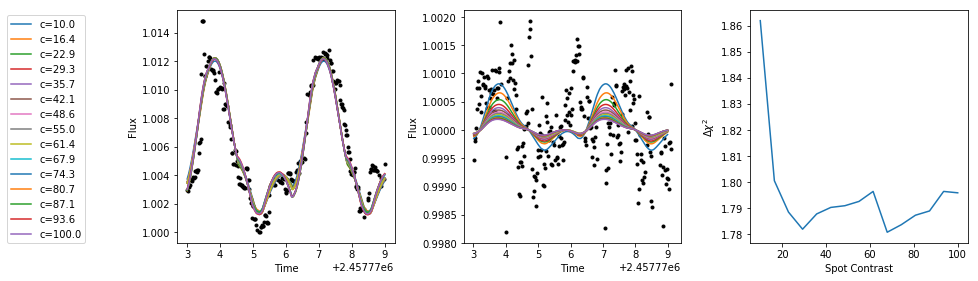

In [573]:
-

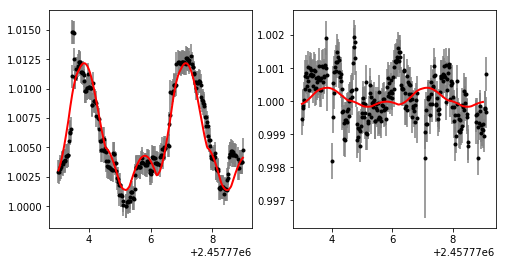

In [579]:
best_params = sampler.flatchain[np.argmax(sampler.flatlnprobability), :]
best_model_k2, best_model_sp = model(best_params, k2_time)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].errorbar(k2_time, k2_flux, 2*k2_err, fmt='.', color='k', ecolor='gray')
ax[1].errorbar(spitzer_times, spitzer_fluxes, spitzer_errors*2, fmt='.', color='k', ecolor='gray')

ax[0].plot(k2_time, best_model_k2, color='r', zorder=10, lw=2)
ax[1].plot(k2_time, best_model_sp, color='r', zorder=10, lw=2)

In [580]:
extended_model_k2, extended_model_sp = model(best_params, spitzer_time)


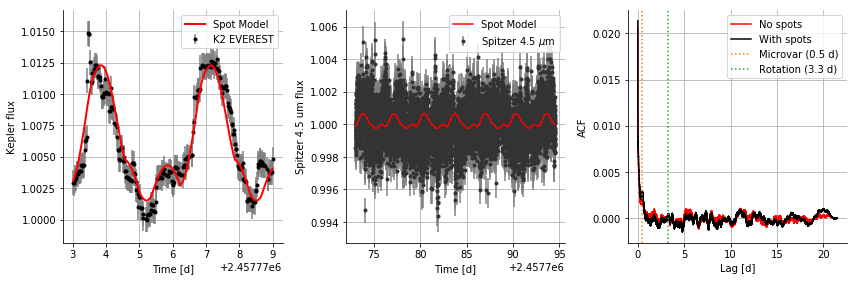

In [370]:
from interpacf import interpolated_acf, dominant_period

lag, acf = interpolated_acf(spitzer_time, spitzer_flux + (extended_model_sp - 1) - 1)

lag_nospots, acf_nospots = interpolated_acf(spitzer_time, spitzer_flux - 1)

best_period = dominant_period(lag, acf)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].errorbar(k2_time, k2_flux, 2*k2_err, fmt='.', color='k', ecolor='gray', label='K2 EVEREST')
ax[0].plot(k2_time, best_model_k2, color='r', zorder=10, lw=2, label='Spot Model')
ax[0].set(xlabel='Time [d]', ylabel='Kepler flux')
ax[0].legend()

ax[1].errorbar(spitzer_time, spitzer_flux, spitzer_err, label='Spitzer 4.5 $\mu$m', fmt='.', color='#333333', ecolor='gray')
ax[1].plot(spitzer_time, extended_model_sp, label='Spot Model', color='r', zorder=10)
ax[1].legend()

ax[2].plot(lag_nospots, acf_nospots, color='r', label='No spots')
ax[2].plot(lag, acf, color='k', label='With spots')

ax[2].set_xlabel('Lag [d]')
ax[2].set_ylabel('ACF')
ax[1].set(xlabel='Time [d]', ylabel='Spitzer 4.5 um flux')
ax[2].axvline(0.5, ls=':', color='C1', label='Microvar (0.5 d)')
ax[2].axvline(3.3, ls=':', color='C2', label='Rotation (3.3 d)')
ax[2].legend()

for axis in ax: 
    axis.grid()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

fig.tight_layout()
fig.savefig('best_bright_spot_model.png', bbox_inches='tight', dpi=250)
fig.savefig('best_bright_spot_model.pdf', bbox_inches='tight')

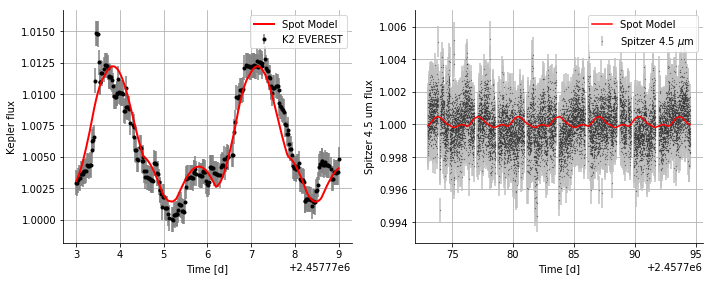

In [576]:
from interpacf import interpolated_acf, dominant_period

lag, acf = interpolated_acf(spitzer_time, spitzer_flux + (extended_model_sp - 1) - 1)

lag_nospots, acf_nospots = interpolated_acf(spitzer_time, spitzer_flux - 1)

best_period = dominant_period(lag, acf)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].errorbar(k2_time, k2_flux, 2*k2_err, fmt='.', color='k', ecolor='gray', label='K2 EVEREST')
ax[0].plot(k2_time, best_model_k2, color='r', zorder=10, lw=2, label='Spot Model')
ax[0].set(xlabel='Time [d]', ylabel='Kepler flux')
ax[0].legend()

ax[1].errorbar(spitzer_time, spitzer_flux, spitzer_err, label='Spitzer 4.5 $\mu$m', 
               fmt='.', color='#333333', ecolor='silver', ms=0.5)
ax[1].plot(spitzer_time, extended_model_sp, label='Spot Model', color='r', zorder=10)
ax[1].legend()
ax[1].set(xlabel='Time [d]', ylabel='Spitzer 4.5 um flux')

for axis in ax: 
    axis.grid()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

fig.tight_layout()
fig.savefig('best_bright_spot_model.png', bbox_inches='tight', dpi=250)
fig.savefig('best_bright_spot_model.pdf', bbox_inches='tight')

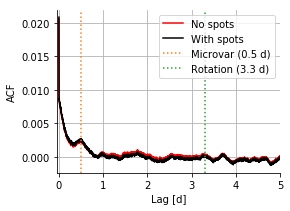

In [577]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(lag_nospots, acf_nospots, color='r', label='No spots')
ax.plot(lag, acf, color='k', label='With spots')

ax.set_xlabel('Lag [d]')
ax.set_ylabel('ACF')
ax.axvline(0.5, ls=':', color='C1', label='Microvar (0.5 d)')
ax.axvline(3.3, ls=':', color='C2', label='Rotation (3.3 d)')
ax.legend()
ax.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([-0.05, 5])
fig.savefig('acf_sanity.pdf', bbox_inches='tight')

Spot radii: 

In [581]:
np.median(samples[:, 2::3], axis=0), np.std(samples[:, 2::3], axis=0)

(array([ 0.02071754,  0.01354459,  0.01327499]),
 array([ 0.00220993,  0.00171122,  0.00235764]))

Spot contrast in the kepler band

In [582]:
np.median(samples[:, -2]), np.std(samples[:, -2])

(25.082025934520296, 6.1849706697594078)

spot contrast in the spitzer band

In [603]:
spitz_contrast = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]))
plus_minus = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]) + np.std(samples[:, -2]))

print(spitz_contrast, plus_minus - spitz_contrast)

2.303378101530137 0.11349882543516143


Total spot coverage

In [592]:
np.sum(np.pi * np.median(samples[:, 2::3], axis=0)**2 / (4 * np.pi))

0.00019722444708952639

In [593]:
typical_spot_radius = np.median(np.median(samples[:, 2::3], axis=0))

typical_spot_radius_err = np.median(np.std(samples[:, 2::3], axis=0))

typical_spot_contrast_kepler = np.median(samples[:, -2])

typical_spot_contrast_kepler_err = np.std(samples[:, -2])

typical_spot_contrast_spitzer = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]))

typical_spot_contrast_err = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]) + np.std(samples[:, -2])) - typical_spot_contrast_spitzer


print(typical_spot_radius, typical_spot_contrast_kepler)

contamination_kepler = 1 + typical_spot_contrast_kepler * typical_spot_radius**2

contamination_kepler_error = np.sqrt( (typical_spot_radius**2 * typical_spot_contrast_kepler_err)**2 + 
                                      (2 * (typical_spot_contrast_kepler - 1)*typical_spot_radius*typical_spot_radius_err)**2 )

contamination_spitzer = 1 + typical_spot_contrast_spitzer * typical_spot_radius**2

contamination_spitzer_error = np.sqrt( (typical_spot_radius**2 * typical_spot_contrast_err)**2 + 
                                      (2 * (typical_spot_contrast_spitzer - 1)*typical_spot_radius*typical_spot_radius_err)**2 )



print(contamination_kepler, contamination_kepler_error)
print(contamination_spitzer, contamination_spitzer_error)
#contamination_spitzer

0.0135445924109 25.0820259345
1.00460144774 0.00183464092618
1.0004225685 8.07575388716e-05


In [594]:
from astropy.constants import R_sun, R_earth, M_earth

R_star = 0.117 * R_sun

(typical_spot_radius * R_star).to(u.km)

<Quantity 1102.487834012214 km>

In [595]:
from libra import trappist1

rps = [trappist1(p).rp for p in list('bcdefgh')]

In [596]:

old_depths = np.array([[0.7266, 0.0088], [0.687, 0.010], [0.367, 0.017], [0.519, 0.026], 
                       [0.673, 0.023], [0.782, 0.027], [0.352, 0.0326]]) / 100

sigma_R_star = 0.0036 * R_sun
new_depths = old_depths * contamination_kepler

old_radii = np.array([[1.086,  0.035], [1.056,  0.035], [0.772,  0.030], [0.918,  0.039], 
                      [1.045,  0.038], [1.127, 0.041], [0.755,  0.034]])

masses = np.array([[0.85, 0.72], [1.38, 0.61], [0.41, 0.27], [0.62, 0.58], 
                   [0.68, 0.18], [1.34, 0.88], [1.0, 1.0]])

old_densities = np.array([[0.66,0.56], [1.17, 0.53], [0.89, 0.60], [0.80, 0.76],
                          [0.60,  0.17], [0.94,  0.63], [1.0, 1.0]])

new_radii = ((np.sqrt(new_depths[:, 0]) * R_star / R_earth).decompose()).value
new_radii_errors = (((np.sqrt((0.5 * R_star/ np.sqrt(new_depths[:, 0]) * new_depths[:, 1])**2 + 
                           (np.sqrt(new_depths[:, 0]) * sigma_R_star)**2 )) ) / R_earth).decompose().value

new_radii = np.vstack([new_radii, new_radii_errors]).T

new_densities = masses[:, 0] * M_earth /(4/3 * np.pi * (new_radii[:, 0] * R_earth)**3)
new_densities_errors = np.sqrt( (masses[:, 1] * M_earth/(4/3 * np.pi * (new_radii[:, 0] * R_earth)**3))**2 + 
                                ((new_radii[:, 1] * R_earth * masses[:, 1] * M_earth) / 
                                 (4 * np.pi * (new_radii[:, 0] * R_earth)**4))**2 ) 

density_earth = M_earth / (4/3 * np.pi * R_earth**3)

new_densities = (np.vstack([new_densities, new_densities_errors]).T  / density_earth).value

In [597]:
new_densities

array([[ 0.65574579,  0.55548561],
       [ 1.15798693,  0.51189222],
       [ 0.88113903,  0.5803101 ],
       [ 0.79231947,  0.74126691],
       [ 0.58849936,  0.15578996],
       [ 0.92587924,  0.60808214],
       [ 2.28794554,  2.2883384 ]])

In [598]:
from astropy.table import Table


def formatter(array):
    formatted = []
    for row in array: 
        formatted.append(r"${0:.3f} \pm {1:.3f}$".format(row[0], row[1]))
    return formatted

columns = [list('bcdefgh'), formatter(old_depths*100), formatter(new_depths*100), formatter(old_radii), 
           formatter(new_radii), formatter(old_densities), formatter(new_densities)]
names = ["Planet", "Gillon+ (2017) Depth", "Depth (this work)", "Gillon+ (2017) Radii", 
         "Radii (this work)", "Gillon+ (2017) Densities", "Densities (this work)"]
table = Table(columns, names=names)

ascii.write(table, format='latex')

\begin{table}
\begin{tabular}{ccccccc}
Planet & Gillon+ (2017) Depth & Depth (this work) & Gillon+ (2017) Radii & Radii (this work) & Gillon+ (2017) Densities & Densities (this work) \\
b & $0.727 \pm 0.009$ & $0.730 \pm 0.009$ & $1.086 \pm 0.035$ & $1.090 \pm 0.034$ & $0.660 \pm 0.560$ & $0.656 \pm 0.555$ \\
c & $0.687 \pm 0.010$ & $0.690 \pm 0.010$ & $1.056 \pm 0.035$ & $1.060 \pm 0.034$ & $1.170 \pm 0.530$ & $1.158 \pm 0.512$ \\
d & $0.367 \pm 0.017$ & $0.369 \pm 0.017$ & $0.772 \pm 0.030$ & $0.775 \pm 0.030$ & $0.890 \pm 0.600$ & $0.881 \pm 0.580$ \\
e & $0.519 \pm 0.026$ & $0.521 \pm 0.026$ & $0.918 \pm 0.039$ & $0.922 \pm 0.037$ & $0.800 \pm 0.760$ & $0.792 \pm 0.741$ \\
f & $0.673 \pm 0.023$ & $0.676 \pm 0.023$ & $1.045 \pm 0.038$ & $1.049 \pm 0.037$ & $0.600 \pm 0.170$ & $0.588 \pm 0.156$ \\
g & $0.782 \pm 0.027$ & $0.786 \pm 0.027$ & $1.127 \pm 0.041$ & $1.131 \pm 0.040$ & $0.940 \pm 0.630$ & $0.926 \pm 0.608$ \\
h & $0.352 \pm 0.033$ & $0.354 \pm 0.033$ & $0.755 \pm 0.034$ & 

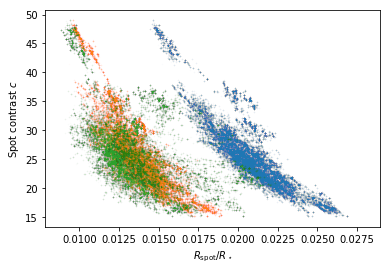

In [599]:
radii = samples[:, 2::3]
contrasts = samples[:, -2]

for rad in radii.T: 
    plt.scatter(rad, contrasts, s=1, alpha=0.01)
    
plt.xlabel('$R_\mathrm{spot}/R_\star$')
plt.ylabel('Spot contrast $c$')
plt.savefig('radius_contrast.png', bbox_inches='tight', dpi=200)

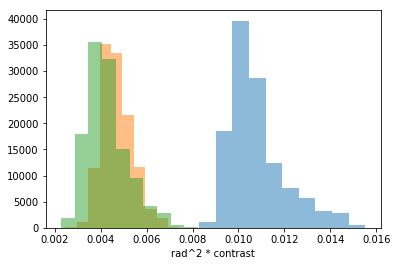

In [567]:
for rad in radii.T: 
    plt.hist(rad**2 * contrasts, alpha=0.5)
plt.xlabel('rad^2 * contrast')
plt.savefig('rad2_contrast.png')